## Predicting Heart Disease using Machine Learning

This notebook looks into various Python-based Machine Learning Mopdel and data science libraries in an attempt top build a 
machine learning model and data science libraries in an attempt to buiild a machine learning model capable of predicting 
whether or not someone has heart disease based on their medical attributes.
We're going to take the following approach:
1) Problem Definition
2) Data
3) Evaluation
4) Features
5) Modelling
6) Experimentation

## 1. Problem Definition
In a statement,
> Given clinical parameter about a patient, can we predict whether or not they have hearet disease.

## 2. Data
* 1. age
* 2. sex
* 3. chest pain type (4 values)
* 4. resting blood pressure
* 5. serum cholesterol in mg/dl
* 6. fasting blood sugar > 120 mg/dl
* 7. resting electrocardiographic results (values 0,1,2)
* 8. maximum heart rate achieved
* 9. exercise induced angina
* 10. oldpeak = ST depression induced by exercise relative to rest
* 11. the slope of the peak exercise ST segment
* 12. number of major vessels (0-3) colored by flourosopy
* 13. thal: 3 = normal; 6 = fixed defect; 7 = reversable def

## 3. Evaluation
> If we reach 95% accuracy at predicting whether or not a pateint has heart disease during the proof of concept, we'll
pursue the objective.

## 4. Features
This is where you will get different informtaion about ecah of the features in your data.

## Preparing The Tools

We're going to use pandas, Matplotlib and numpy for data analysis and manipulation.

In [50]:
# Import all the tools we need

# Regular EDA (Expoloratory Data Analysis) and plotting libraries

In [51]:
conda install seaborn

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\prana\Desktop\machine_learning\env

  added / updated specs:
    - seaborn


The following packages will be UPDATED:

  ca-certificates    conda-forge::ca-certificates-2022.12.~ --> pkgs/main::ca-certificates-2023.01.10-haa95532_0 

The following packages will be SUPERSEDED by a higher-priority channel:

  certifi            conda-forge/noarch::certifi-2022.12.7~ --> pkgs/main/win-64::certifi-2022.12.7-py310haa95532_0 





Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done

Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 22.11.1
  latest version: 23.1.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.1.0




In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 
# we want our plots to appear inside the notebook

# Models from scikit-learn

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import RocCurveDisplay

## Load Data

In [53]:
df=pd.read_csv("heart-disease.csv")
df.shape

(303, 14)

## Data Exploration (exploratory data analysis or EDA)

The goal is here to find out more about data and become a subject matter export on the dataset you're working with.

1) What questions you are trying to solve?
2) What kind of data do we have and how do we treat different types?
3) What's missing from the data and how do you deal with it?
4) Where are the outlines and why you showed care abot them?
5) How can you add, change or remove features to get more out of your data?

In [54]:
# Let's find out how many of each class there

df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

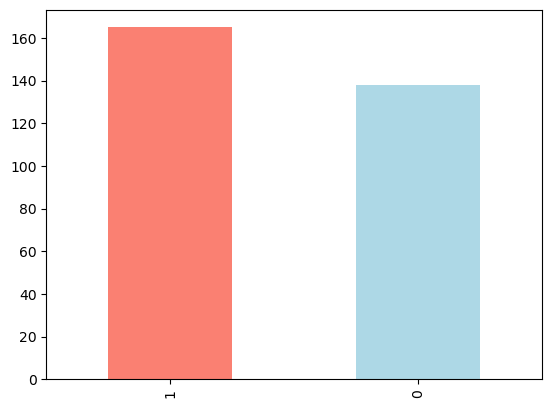

In [55]:
df["target"].value_counts().plot(kind='bar',color=["salmon","lightblue"]);

In [56]:
df.info

<bound method DataFrame.info of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1    

In [57]:
# Check if there are any missing values

df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [58]:
df.describe

<bound method NDFrame.describe of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1  

In [59]:
### Heart disease Frequency according to sex

df.sex.value_counts()
# 1 stands for men
# 0 stands fopr women

1    207
0     96
Name: sex, dtype: int64

In [60]:
# Compare target columns with sex columns
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


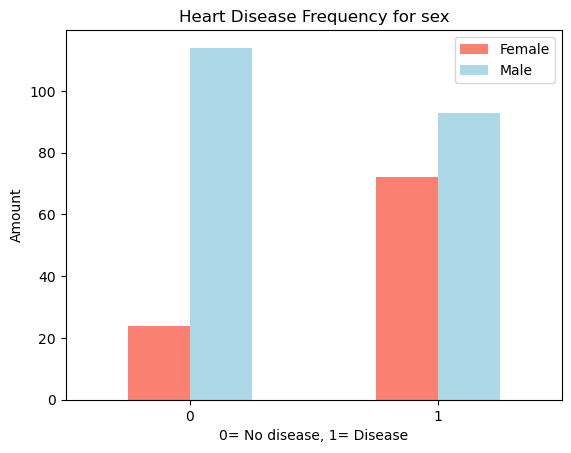

In [61]:
pd.crosstab(df.target,df.sex).plot(kind='bar',color=["salmon","lightblue"])

plt.title("Heart Disease Frequency for sex")
plt.xlabel("0= No disease, 1= Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation=0);

### Age vs Max Heart Rate for Heart Disease

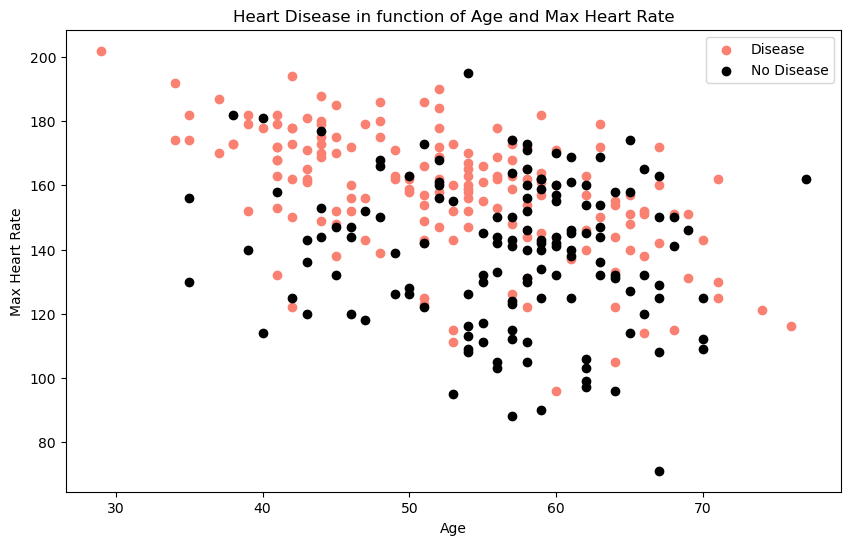

In [62]:
# Create another figure
plt.figure(figsize=(10,6))

# Scatter with positive values

plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           c="salmon")
# scattter with negative values

plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           c="black")

# adding some helpful info 

plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

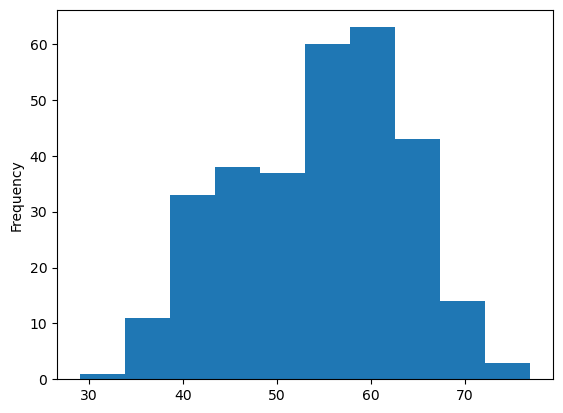

In [63]:
df.age.plot.hist();

In [64]:
### Heart Disease Frequency per chest pain type
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


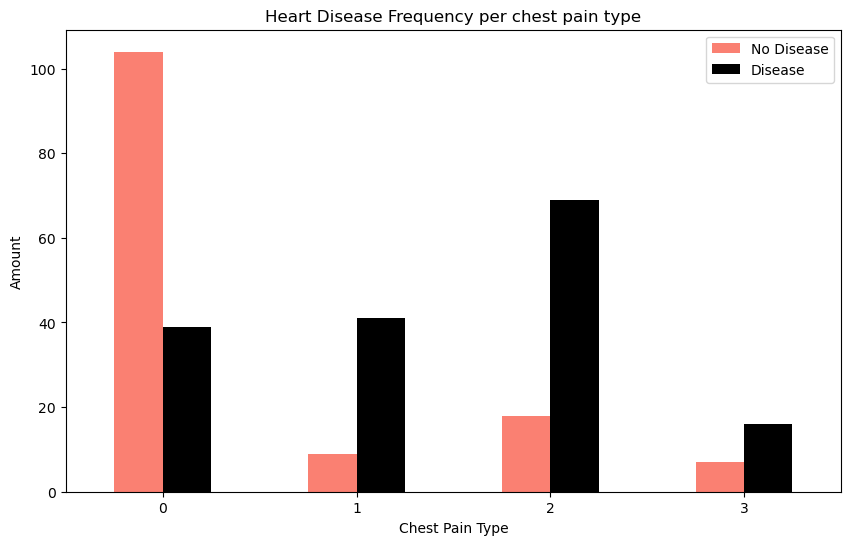

In [65]:
# Making the crosstab more visual
pd.crosstab(df.cp,df.target).plot(kind="bar",
                                 figsize=(10,6),
                                 color=["salmon","black"])

#Add some communication

plt.title("Heart Disease Frequency per chest pain type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease","Disease"])
plt.xticks(rotation=0);

In [66]:
# Make a correlation Matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


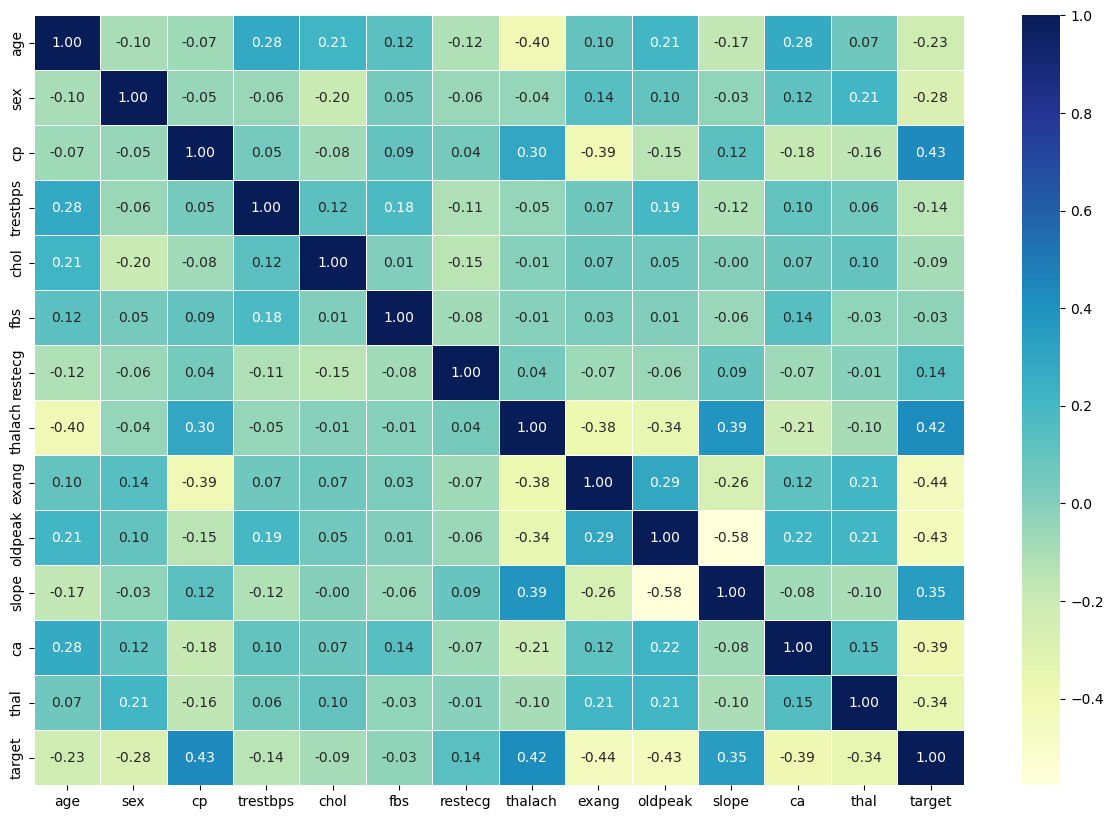

In [67]:
# Let's make our correlation  matrix a little better

corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
              annot=True,
              linewidth=0.5,
              fmt=".2f",
              cmap="YlGnBu");

## 5. Modelling

In [68]:
# split the data into X and Y

X= df.drop("target",axis=1)
y=df["target"]

# split the data into train and test sets
np.random.seed(42)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)


Now we've got our data split into training and test sets. it's time to build a machine learning model. We'll train it 
(find the patterns) on the training set. And we'll test it (use the patterns) on the test set.
We're going to try 3 different machine learning models:
1) Logistic Regression
2) K nearest Neighbor Classifier
3) Random Forest Classifier

In [69]:
# put the models in the dictionary

models={"Logistic Regression": LogisticRegression(),
       "KNN": KNeighborsClassifier(),
       "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models

def fit_and_score (models,X_train,X_test,y_train,y_test):
    """
    Fit and evaluate machine learning models
    models: a dict of differnt scikit-learn Machine Learning model
    X_train: Training data (no labels)
    X_test: Testing data (no labels)
    y_train: Training labels
    y_test: test labels
    """
    # Setup Random Seed
    np.random.seed(42)
    # make a dictionary to keep model scores
    model_scores={}
    #Loop through models
    for name,model in models.items():
        # Fit the module to the data
        model.fit(X_train,y_train)
        # evaluate the model
        model_scores[name]=model.score(X_test,y_test)
    return model_scores

model_scores= fit_and_score(models=models,
                           X_train=X_train,
                           X_test=X_test,
                           y_train=y_train,
                           y_test=y_test)
model_scores

C:\Users\prana\Desktop\machine_learning\env\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## Model Comparisions

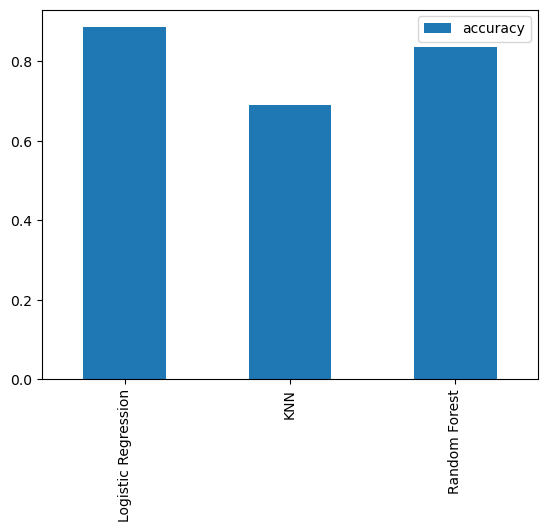

In [70]:
model_compare=pd.DataFrame(model_scores,index=["accuracy"])
model_compare.T.plot.bar();

Now we've got a baseline model and we know a model's first prediction aren't always what we should band or nextr steps off.
What should we do?
Let's look at the following:
* Hyperparameter Tuning
* Feature Importance
* Confusion-Matrix
* Cross-validation
* Precision
* Recall
* F1-score
* Classification Report
* ROC Curve
* Area Under Curve (AUC)

### Hyperparamter Tuning

In [71]:
# Lets tune KNN

train_scores=[]
test_scores=[]

# Create a list of different values for n_neighbors
neighbors=range(1,21)

# Setup KNN Instance
knn=KNeighborsClassifier()

# Loop through differnt n-neighbors

for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(X_train,y_train)
    
    #Updates the training scores list
    
    train_scores.append(knn.score(X_train,y_train))
    
    # Update the test score
    
    test_scores.append(knn.score(X_test,y_test))

In [72]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [73]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN Score on the test data: 75.41%


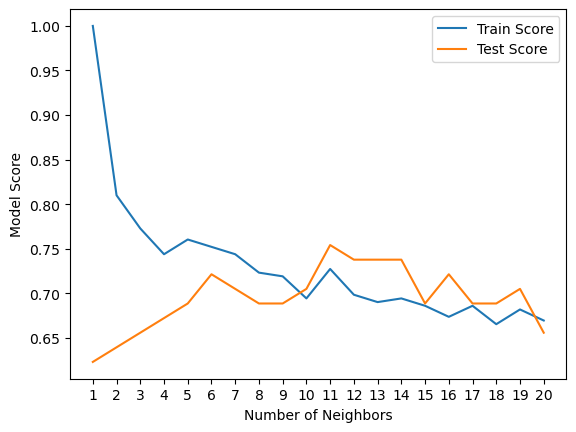

In [74]:
plt.plot(neighbors, train_scores,label="Train Score")
plt.plot(neighbors, test_scores, label="Test Score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of Neighbors")
plt.ylabel("Model Score")
plt.legend()
print(f"Maximum KNN Score on the test data: {max(test_scores)*100:.2f}%")

## Hyperparameters tuning with Randomized Search CV

We're going to tune:
* LogisticRegression()
* RandomForestClassifier()

In [75]:
# Create a hyperparameter grid for logistic regression

log_reg_grid={"C":np.logspace(-4,4,20),
             "solver":["liblinear"]}

In [76]:
# Create a hyperparameter grid for RandomForestClassifier
rf_grid={"n_estimators":np.arange(10,1000,50),
        "max_depth":[None,3,5,10],
        "min_samples_split":np.arange(2,20,2),
        "min_samples_leaf":np.arange(1,20,2)}

Now we've got hyperparameters grids setup for each of our models, let's tune them using RandomizedSearchCV.

In [77]:
# Tune Logistics Regression

np.random.seed(42)

# setup Random hyperparameters search for logistic regression
rs_log_reg=RandomizedSearchCV(LogisticRegression(),
                             param_distributions=log_reg_grid,
                             cv=5,
                             n_iter=20,
                             verbose=True)

# fit random hyperparameters search model for Logistic Regression

rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [78]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [79]:
rs_log_reg.score(X_test,y_test)

0.8852459016393442

Now we've tuned LogisticRegression(), let's do the same for RandomForestClassifier()

In [80]:
#Setup random seed
np.random.seed(42)
rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                        param_distributions=rf_grid,
                        cv=5,
                        n_iter=20,
                        verbose=True)
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [81]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [82]:
rs_rf.score(X_test,y_test)

0.8688524590163934

## Hyperparameter Tuning with GridSearchCV

Since our LogisticRegression Model provides the best score till now so we'll try and improve them again using GridSearchCv

### Different Hyperparameters for our Logistic Regression Model

In [83]:
log_reg_grid={"C":np.logspace(-4,4,30),
             "solver":["liblinear"]}

#Setup grid hyperparamter search for Logistic Regression

gs_log_reg=GridSearchCV(LogisticRegression(),
                       param_grid=log_reg_grid,
                       cv=5,
                       verbose=True)
#Fit grid hyperparameter search model
gs_log_reg.fit(X_train,y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [84]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [85]:
gs_log_reg.score(X_test,y_test)

0.8852459016393442

## Evaluating our tuned machine learning classifier beyond accuracy

* ROC curve and AUC score
* Confusion Matrix
* Classification Report
* Precision
* Recall
* F1-score
  
and it would be great if cross-validation was used where possible.
To make comparision and evaluate our trained model, first we need to make predications|

In [86]:
# Make prediction with tuned model
y_preds=gs_log_reg.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [87]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

In [88]:
import sklearn
sklearn.__version__

'1.2.0'

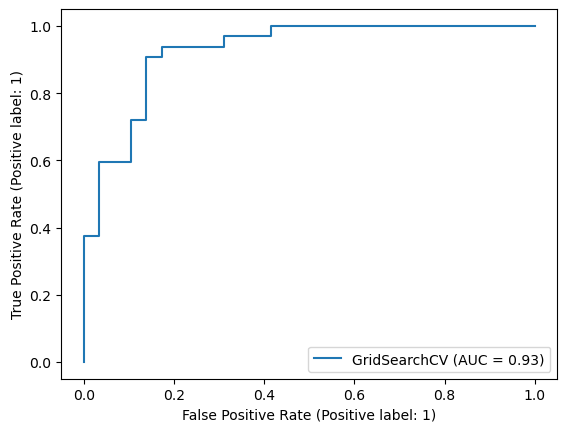

In [93]:
RocCurveDisplay.from_estimator(gs_log_reg,X_test,y_test);

In [94]:
# Confusion Matrix
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


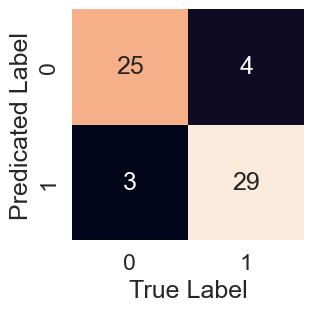

In [95]:
sns.set(font_scale=1.5)
def plot_conf_mat(y_test,y_preds):
    """
    Plots a nice looking confusion matrix using seaborn heatmap()
    """
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),
                  annot=True,
                  cbar=False)
    plt.xlabel("True Label")
    plt.ylabel("Predicated Label")
    
plot_conf_mat(y_test,y_preds);

Now we've got a ROC curve, an AUC metric and a confusion matrix, let's get a classification report as well as 
cross-validated precision,recall and f1-score.

In [96]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate evaluation metrics using cross-validation

We're going tp calculate precision,recall and f1-score of our model using cross-validation and to do so we will be using 
"cross_cal_score".

In [127]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [102]:
clf=LogisticRegression(C =0.20433597178569418,
                       solver = 'liblinear')

In [103]:
np.random.seed(42)
cv_acc=cross_val_score(clf,X,y,cv=5,scoring=None)
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [104]:
# Cross Validated Accuracy
print(f"The cross-validated accuracy is:{np.mean(cv_acc)*100:.2f}")

The cross-validated accuracy is:84.47


In [110]:
cv_acc=np.mean(cv_acc)

In [111]:
# Precision
cv_precision=cross_val_score(clf,X,y,cv=5,scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

0.8207936507936507

In [112]:
# Recall
cv_recall=cross_val_score(clf,X,y,scoring="recall")
cv_recall=np.mean(cv_recall)
cv_recall

0.9212121212121213

In [113]:
# F1-score
cv_f1=cross_val_score(clf,X,y,scoring="f1")
cv_f1=np.mean(cv_f1)
cv_f1

0.8673007976269721

In [117]:
cv_metrics=pd.DataFrame({"Accureacy":cv_acc,
                        "Precision":cv_precision,
                        "Recall":cv_recall,
                        "F1-Score":cv_f1},
                        index=[0])
cv_metrics

,Accureacy,Precision,Recall,F1-Score
0,0.844699,0.820794,0.921212,0.867301


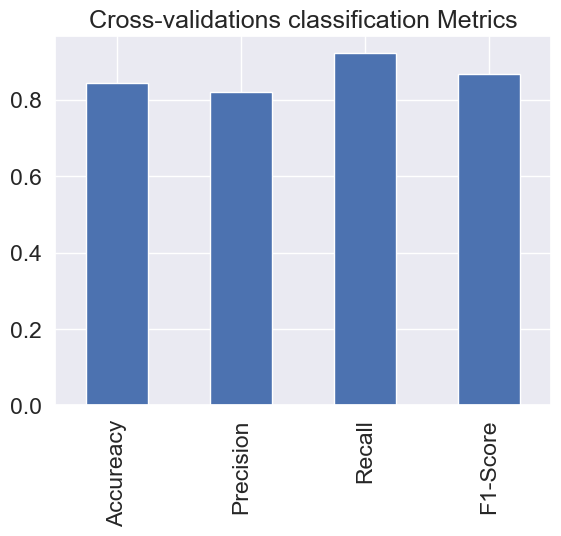

In [123]:
cv_metrics.T.plot.bar(title="Cross-validations classification Metrics",
                     legend=False);


### Feature Importance
Feature Importance is another way of asking, "which features contributed most to the outcomes of the model and how did they contribute?"

Finding Features importance is different for each machine learning model. The way to find features importancce is to search for "(MODEL NAME)" feature Importance.

Let's find the feature importance for our Logistic Regression Model.

In [128]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [129]:
# Fit an instance of logistic regression
clf=LogisticRegression(C=0.20433597178569418,
                       solver='liblinear')

In [130]:
clf.fit(X_train,y_train);

In [131]:
#Check Coef_
clf.coef_

array([[ 0.00316728, -0.86044652,  0.6606704 , -0.01156993, -0.00166375,
         0.04386107,  0.31275848,  0.02459362, -0.60413081, -0.56862803,
         0.45051628, -0.63609898, -0.67663373]])

In [132]:
# Match coef's of features to columns
feature_dict=dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.0031672806268220445,
 'sex': -0.8604465226286001,
 'cp': 0.6606703996492814,
 'trestbps': -0.011569930743501303,
 'chol': -0.001663745833540806,
 'fbs': 0.043861067871676124,
 'restecg': 0.3127584791782968,
 'thalach': 0.02459361509185037,
 'exang': -0.6041308102637141,
 'oldpeak': -0.5686280255489925,
 'slope': 0.4505162810238786,
 'ca': -0.6360989756865822,
 'thal': -0.67663372723561}

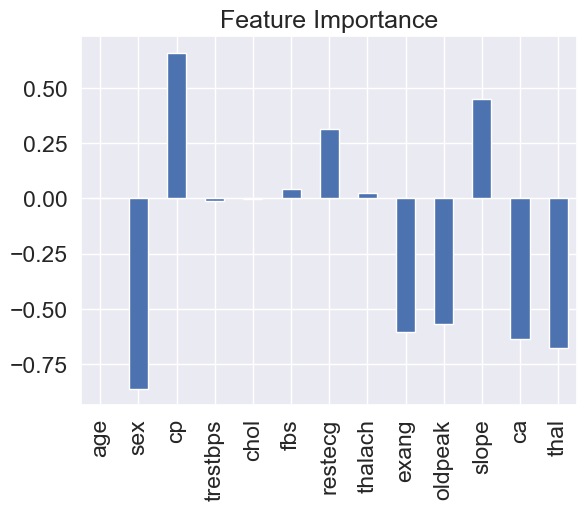

In [133]:
# Visulaize feature Importance
feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="Feature Importance",legend=False);

In [134]:
pd.crosstab(df["sex"],df["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [135]:
pd.crosstab(df["slope"],df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


Slope - the steps pf the peak excercise ST segment
* 0: Upsloping: Better heart rate with excercise(uncommon)
* 1: Flatsloping: minimal change (typical healthy heart)
* 2: Downsloping: signs of unhealthy heart

## 6. Experimentation

If you haven't hit your evaluation metric yet.....
ask yourself..

* Could you collect more data?
* Could you try a better model? 
* Could yoy improve the current models?
* If your model is good enough (you have hit your evaluation metric) how would you export it and share it with others?